In [ ]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK stopwords
nltk.download('stopwords')

# Load the dataset
# Assuming the dataset is a CSV file named 'IMDB_50k.csv' with columns 'review' and 'sentiment'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load the dataset
# Assuming the dataset is a CSV file named 'IMDB_50k.csv' with columns 'review' and 'sentiment'
data=pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
review       0
sentiment    0
dtype: int64


In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [ ]:
print("\nClass Distribution:")
print(data['sentiment'].value_counts())


Class Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


<ipython-input-8-b26972b763f2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['sentiment'], palette='coolwarm')


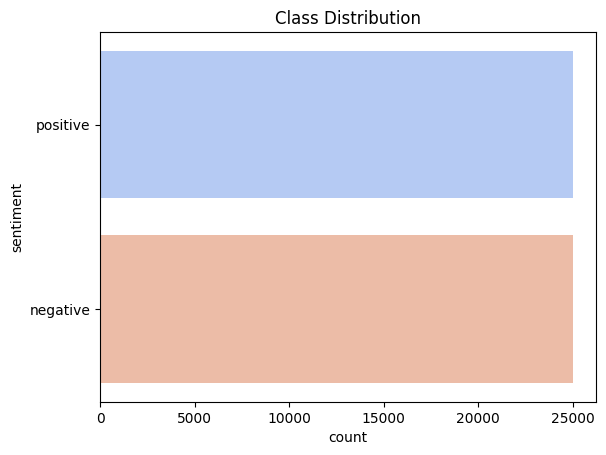

In [ ]:
sns.countplot(data['sentiment'], palette='coolwarm')
plt.title('Class Distribution')
plt.show()


In [ ]:
data['review_length'] = data['review'].apply(lambda x: len(x.split()))
print("\nReview Length Statistics:")
print(data['review_length'].describe())


Review Length Statistics:
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


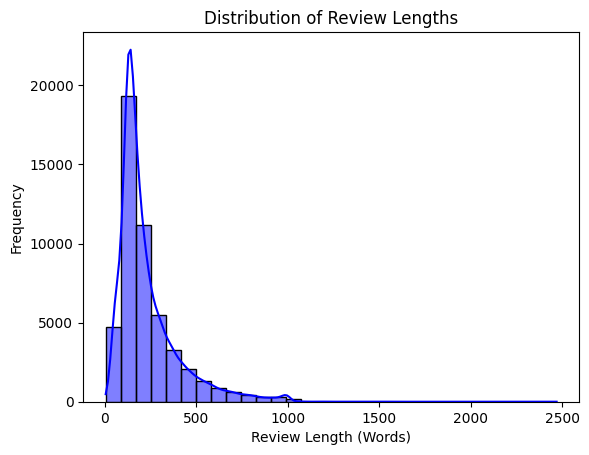

In [ ]:
sns.histplot(data['review_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Words)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Visualize frequent words
stop_words = set(stopwords.words('english'))
positive_reviews = " ".join(data[data['sentiment'] == 'positive']['review'])
negative_reviews = " ".join(data[data['sentiment'] == 'negative']['review'])

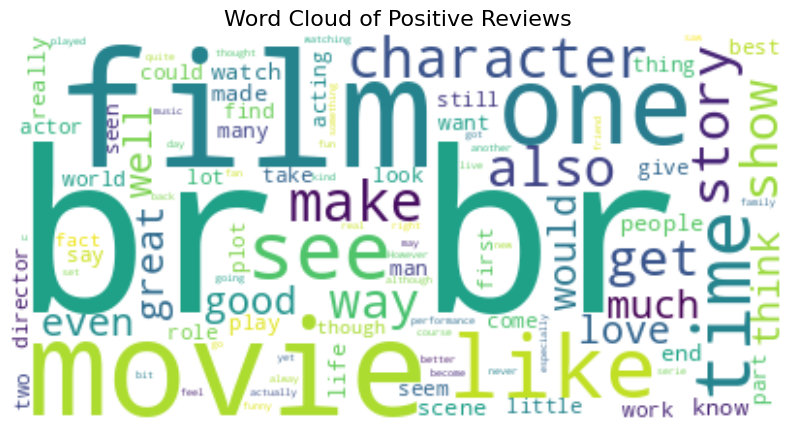

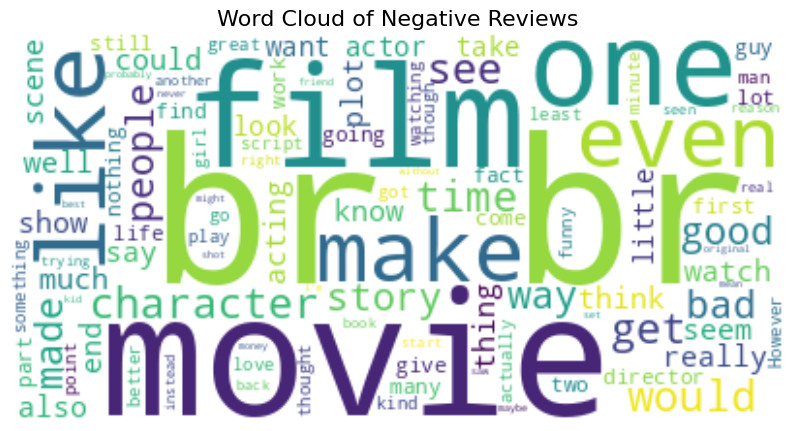

In [ ]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

generate_wordcloud(positive_reviews, "Word Cloud of Positive Reviews")
generate_wordcloud(negative_reviews, "Word Cloud of Negative Reviews")

In [ ]:
# Import required libraries
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# The rest of your code should remain as is...

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to the dataset
print("\nPreprocessing reviews...")
data['cleaned_review'] = data['review'].apply(preprocess_text)
print("Preprocessing complete.")


Preprocessing reviews...
Preprocessing complete.


In [ ]:
# Show a sample of cleaned reviews
print("\nSample Cleaned Reviews:")
print(data[['review', 'cleaned_review']].head())


Sample Cleaned Reviews:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


In [ ]:
# Vectorization (Bag of Words and TF-IDF)
# Bag of Words
print("\nApplying Bag of Words...")
bow_vectorizer = CountVectorizer(max_features=5000)  # Limit to 5000 most frequent words
bow_features = bow_vectorizer.fit_transform(data['cleaned_review'])


Applying Bag of Words...


In [ ]:
print("\nApplying TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most frequent words
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_review'])



Applying TF-IDF...


In [ ]:
print("\nBag of Words Features Shape:", bow_features.shape)
print("TF-IDF Features Shape:", tfidf_features.shape)


Bag of Words Features Shape: (50000, 5000)
TF-IDF Features Shape: (50000, 5000)


In [ ]:
print("\nBag of Words Features:")
print(bow_features)


Bag of Words Features:
  (0, 3086)	1
  (0, 3687)	1
  (0, 2778)	1
  (0, 4832)	2
  (0, 3137)	5
  (0, 1467)	2
  (0, 4990)	1
  (0, 2119)	1
  (0, 3707)	2
  (0, 1513)	1
  (0, 1993)	1
  (0, 1697)	2
  (0, 4468)	1
  (0, 4258)	2
  (0, 543)	1
  (0, 3831)	1
  (0, 4763)	4
  (0, 3914)	1
  (0, 4938)	1
  (0, 1883)	2
  (0, 4610)	1
  (0, 3975)	4
  (0, 3451)	1
  (0, 3456)	1
  (0, 3583)	1
  :	:
  (49999, 4949)	1
  (49999, 1608)	2
  (49999, 2146)	1
  (49999, 4608)	1
  (49999, 680)	1
  (49999, 3818)	1
  (49999, 2470)	1
  (49999, 4670)	1
  (49999, 2540)	1
  (49999, 1538)	1
  (49999, 303)	1
  (49999, 2002)	1
  (49999, 2225)	1
  (49999, 2205)	1
  (49999, 241)	1
  (49999, 4588)	1
  (49999, 2457)	1
  (49999, 4154)	1
  (49999, 3632)	1
  (49999, 581)	1
  (49999, 2995)	1
  (49999, 684)	1
  (49999, 1897)	1
  (49999, 3630)	1
  (49999, 2903)	1


In [ ]:
print("\nTF-IDF Features:")
print(tfidf_features)


TF-IDF Features:
  (0, 3086)	0.022306340769509683
  (0, 3687)	0.0716098594890523
  (0, 2778)	0.06997013472849029
  (0, 4832)	0.08220463762202762
  (0, 3137)	0.47260726598173247
  (0, 1467)	0.11279543497089747
  (0, 4990)	0.05792759900745007
  (0, 2119)	0.0884283468115394
  (0, 3707)	0.09072957775856476
  (0, 1513)	0.06118924586115793
  (0, 1993)	0.06126011378849219
  (0, 1697)	0.06827831217826244
  (0, 4468)	0.034484905907198556
  (0, 4258)	0.1771814513806625
  (0, 543)	0.09851073786514736
  (0, 3831)	0.03333634078441469
  (0, 4763)	0.25095990028835147
  (0, 3914)	0.04650048507467132
  (0, 4938)	0.05348789066286241
  (0, 1883)	0.07135314796729297
  (0, 4610)	0.07763035600809258
  (0, 3975)	0.15304406167950377
  (0, 3451)	0.06917492387135953
  (0, 3456)	0.08224792976382196
  (0, 3583)	0.08260003424873928
  :	:
  (49999, 4949)	0.09967306284736142
  (49999, 1608)	0.18895470226431363
  (49999, 2146)	0.0938134095848708
  (49999, 4608)	0.10421390262146894
  (49999, 680)	0.1210849951944911
 

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
# Prepare the data
X = tfidf_features  # You can use bow_features or tfidf_features
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Convert labels to binary


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Naive Bayes Classifier
print("\nTraining Naive Bayes Classifier...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)


Training Naive Bayes Classifier...


In [ ]:
# Logistic Regression Classifier
print("\nTraining Logistic Regression Classifier...")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


Training Logistic Regression Classifier...


In [ ]:
# Evaluation Function
def evaluate_model(name, y_test, y_preds):
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_preds):.4f}")
    print(f"Precision: {precision_score(y_test, y_preds):.4f}")
    print(f"Recall: {recall_score(y_test, y_preds):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_preds):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_preds))

In [ ]:
# Evaluate Traditional Models
evaluate_model("Naive Bayes", y_test, nb_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)


Naive Bayes Performance:
Accuracy: 0.8490
Precision: 0.8475
Recall: 0.8539
F1 Score: 0.8507

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Logistic Regression Performance:
Accuracy: 0.8845
Precision: 0.8756
Recall: 0.8984
F1 Score: 0.8869

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# Prepare data for deep learning (padding and embedding)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenize and pad text
tokenizer = Tokenizer(num_words=5000)  # Match max_features used in TF-IDF
tokenizer.fit_on_texts(data['cleaned_review'])
X_dl = tokenizer.texts_to_sequences(data['cleaned_review'])
X_dl = pad_sequences(X_dl, maxlen=200)  # Pad sequences to fixed length

In [ ]:
# Update train-test split for deep learning
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y, test_size=0.2, random_state=42)


In [ ]:
# Build the LSTM Model
print("\nTraining LSTM Model...")
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Training LSTM Model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train the LSTM model
history = lstm_model.fit(X_train_dl, y_train_dl, epochs=5, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.7695 - loss: 0.4645 - val_accuracy: 0.8701 - val_loss: 0.3193
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9008 - loss: 0.2503 - val_accuracy: 0.8704 - val_loss: 0.3075
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9226 - loss: 0.2044 - val_accuracy: 0.8683 - val_loss: 0.3299
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9394 - loss: 0.1646 - val_accuracy: 0.8694 - val_loss: 0.3419
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9574 - loss: 0.1224 - val_accuracy: 0.8685 - val_loss: 0.3870


In [ ]:
# Evaluate the LSTM Model
print("\nEvaluating LSTM Model...")
lstm_preds = (lstm_model.predict(X_test_dl) > 0.5).astype("int32").flatten()
evaluate_model("LSTM", y_test_dl, lstm_preds)


Evaluating LSTM Model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

LSTM Performance:
Accuracy: 0.8707
Precision: 0.8551
Recall: 0.8950
F1 Score: 0.8746

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4961
           1       0.86      0.90      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
# Import required libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Function to evaluate model performance
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Model Evaluation:")
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Naive Bayes Model Evaluation:
Accuracy: 0.8490
Precision: 0.8475
Recall: 0.8539
F1 Score: 0.8507

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



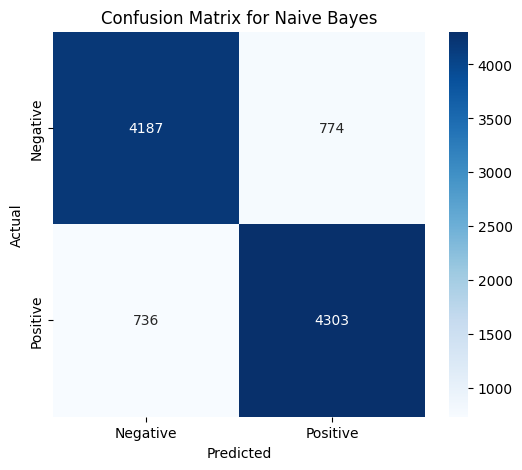

In [ ]:
# Evaluate Naive Bayes Model
evaluate_model("Naive Bayes", y_test, nb_preds)


Logistic Regression Model Evaluation:
Accuracy: 0.8845
Precision: 0.8756
Recall: 0.8984
F1 Score: 0.8869

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



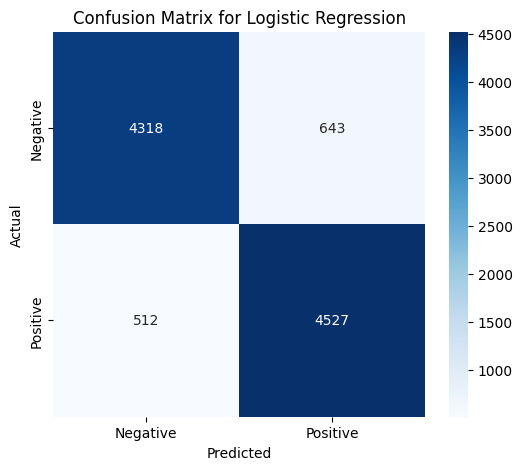

In [ ]:
# Evaluate Logistic Regression Model
evaluate_model("Logistic Regression", y_test, lr_preds)



LSTM Model Evaluation:
Accuracy: 0.8707
Precision: 0.8551
Recall: 0.8950
F1 Score: 0.8746

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4961
           1       0.86      0.90      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



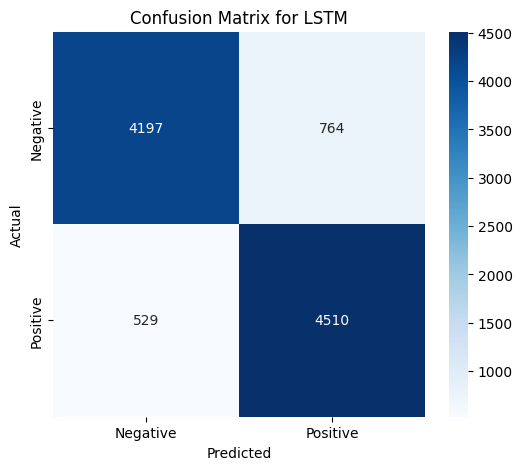

In [ ]:
# Evaluate LSTM Model
evaluate_model("LSTM", y_test_dl, lstm_preds)



Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes    0.8490   0.847548  0.853939  0.850732
1  Logistic Regression    0.8845   0.875629  0.898393  0.886865
2                 LSTM    0.8707   0.855138  0.895019  0.874624


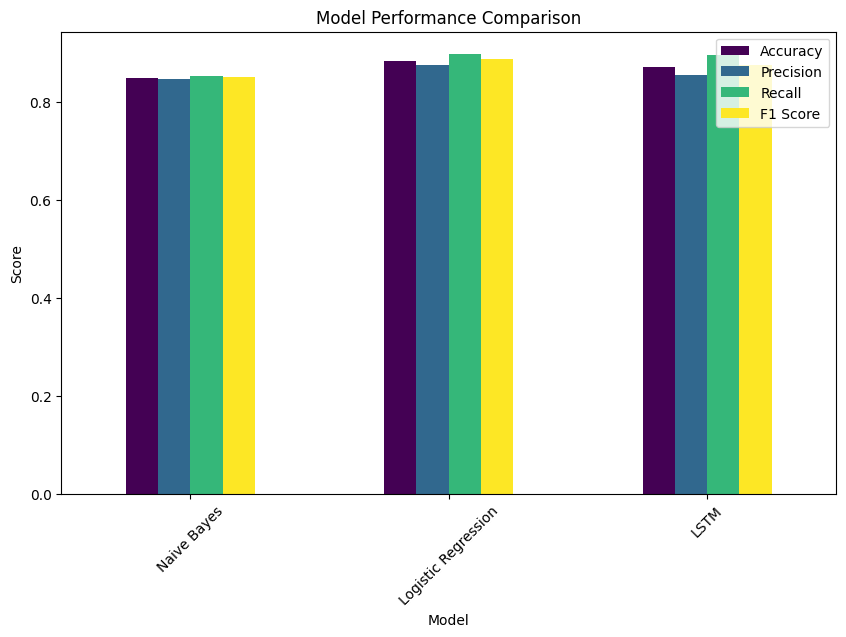

In [ ]:
# Compare Model Metrics
def compare_models(models):
    print("\nModel Comparison:")
    comparison_df = pd.DataFrame(models, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
    print(comparison_df)
    comparison_df.set_index("Model", inplace=True)

    # Plot comparison metrics
    comparison_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.xlabel("Model")
    plt.legend(loc="best")
    plt.xticks(rotation=45)
    plt.show()

# Collect metrics for all models
model_metrics = [
    ["Naive Bayes", accuracy_score(y_test, nb_preds), precision_score(y_test, nb_preds), recall_score(y_test, nb_preds), f1_score(y_test, nb_preds)],
    ["Logistic Regression", accuracy_score(y_test, lr_preds), precision_score(y_test, lr_preds), recall_score(y_test, lr_preds), f1_score(y_test, lr_preds)],
    ["LSTM", accuracy_score(y_test_dl, lstm_preds), precision_score(y_test_dl, lstm_preds), recall_score(y_test_dl, lstm_preds), f1_score(y_test_dl, lstm_preds)]
]

# Compare and visualize models
compare_models(model_metrics)

In [ ]:
# Install BERTopic if not already installed
!pip install bertopic

# Install other required libraries
!pip install gensim
!pip install pyLDAvis
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.6 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from bertopic import BERTopic
import umap
import re


In [ ]:
# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Display a sample of cleaned reviews
print("Sample Cleaned Reviews:")
print(data['cleaned_review'].head())


Sample Cleaned Reviews:
0    one reviewer mentioned watching oz episode you...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: cleaned_review, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Tokenize the cleaned reviews
data['tokens'] = data['cleaned_review'].apply(lambda x: x.split())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(data['tokens'])

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)

# Create the corpus: List of bag-of-words vectors
corpus = [dictionary.doc2bow(text) for text in data['tokens']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Set the number of topics
num_topics = 10

# Build the LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=num_topics,
                                   random_state=42,
                                   update_every=1,
                                   chunksize=100,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1: 0.043*"man" + 0.016*"wife" + 0.014*"he" + 0.011*"men" + 0.010*"murder" + 0.009*"becomes" + 0.008*"town" + 0.008*"death" + 0.007*"city" + 0.007*"police"

Topic 2: 0.048*"show" + 0.020*"back" + 0.020*"new" + 0.015*"tv" + 0.014*"episode" + 0.013*"around" + 0.012*"night" + 0.011*"find" + 0.010*"black" + 0.008*"car"

Topic 3: 0.032*"horror" + 0.029*"original" + 0.028*"series" + 0.026*"effect" + 0.018*"special" + 0.014*"dead" + 0.013*"flick" + 0.013*"killer" + 0.012*"budget" + 0.012*"evil"

Topic 4: 0.029*"story" + 0.020*"great" + 0.019*"time" + 0.019*"well" + 0.017*"life" + 0.017*"also" + 0.015*"love" + 0.015*"many" + 0.013*"year" + 0.011*"best"

Topic 5: 0.044*"character" + 0.033*"scene" + 0.020*"end" + 0.019*"plot" + 0.014*"little" + 0.014*"much" + 0.012*"two" + 0.011*"seems" + 0.011*"doesnt" + 0.011*"point"

Topic 6: 0.032*"like" + 0.021*"good" + 0.019*"really" + 0.017*"even" + 0.016*"would" + 0.016*"get" + 0.015*"bad" + 0.013*"thing" + 0.013*"dont" + 0.013*"see"

Topic 7: 0.028

In [ ]:
# Prepare the visualization
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_vis)

# Alternatively, to save the visualization as an HTML file
pyLDAvis.save_html(lda_vis, 'lda_topic_visualization.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Initialize BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model on the cleaned reviews
topics, probabilities = topic_model.fit_transform(data['cleaned_review'])

# Display the top 10 topics
print(topic_model.get_topic_info().head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-12-26 08:59:29,731 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

2024-12-26 09:01:04,261 - BERTopic - Embedding - Completed ✓
2024-12-26 09:01:04,263 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-26 09:02:18,993 - BERTopic - Dimensionality - Completed ✓
2024-12-26 09:02:18,996 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-26 09:26:04,495 - BERTopic - Cluster - Completed ✓
2024-12-26 09:26:04,520 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-26 09:26:10,573 - BERTopic - Representation - Completed ✓


   Topic  Count                               Name  \
0     -1  30246             -1_movie_film_like_one   
1      0   1028             0_horror_house_car_get   
2      1    693      1_bollywood_indian_khan_india   
3      2    637        2_horror_scary_scare_scared   
4      3    562              3_worst_ever_seen_ive   
5      4    436  4_love_romantic_relationship_life   
6      5    429       5_woman_husband_alice_mother   
7      6    361            6_kid_child_worm_parent   
8      7    355        7_christian_jesus_bible_god   
9      8    299          8_zombie_dead_undead_fido   

                                      Representation  \
0  [movie, film, like, one, bad, good, time, woul...   
1  [horror, house, car, get, guy, even, scene, ch...   
2  [bollywood, indian, khan, india, salman, hindi...   
3  [horror, scary, scare, scared, gore, ghost, cr...   
4  [worst, ever, seen, ive, horrible, bad, terrib...   
5  [love, romantic, relationship, life, heart, be...   
6  [woman, hu

In [ ]:
# Get the most representative words for each topic
for topic in topic_model.get_topic_info()['Name'].unique():
    if topic != -1:  # -1 is usually the outlier topic
        print(f"\nTopic {topic}:")
        print(topic_model.get_topic(topic))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic -1_movie_film_like_one:
False

Topic 0_horror_house_car_get:
False

Topic 1_bollywood_indian_khan_india:
False

Topic 2_horror_scary_scare_scared:
False

Topic 3_worst_ever_seen_ive:
False

Topic 4_love_romantic_relationship_life:
False

Topic 5_woman_husband_alice_mother:
False

Topic 6_kid_child_worm_parent:
False

Topic 7_christian_jesus_bible_god:
False

Topic 8_zombie_dead_undead_fido:
False

Topic 9_western_stewart_wayne_ford:
False

Topic 10_funny_laugh_joke_comedy:
False

Topic 11_book_read_novel_adaptation:
False

Topic 12_french_france_le_depardieu:
False

Topic 13_vampire_dracula_lestat_helsing:
False

Topic 14_season_episode_show_abc:
False

Topic 15_review_comment_critic_write:
False

Topic 16_hitchcock_bruno_hitch_cummings:
False

Topic 17_chinese_china_zhang_hong:
False

Topic 18_trek_spock_kirk_enterprise:
False

Topic 19_christmas_santa_claus_holiday:
False

Topic 20_swedish_andreas_danish_finnish:
False

Topic 21_french_paris_france_de:
False

Topic 22_austen_e

In [ ]:
# Visualize topics
fig = topic_model.visualize_topics()
fig.show()

# Visualize the topic distribution
# Assuming you want to visualize the distribution for the first document
fig = topic_model.visualize_distribution(probabilities=probabilities[0])
fig.show()

# Visualize hierarchical topics
fig = topic_model.visualize_hierarchy()
fig.show()

# Visualize topic similarity
fig = topic_model.visualize_heatmap()
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from gensim.models import CoherenceModel

# Calculate coherence score for LDA
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"LDA Coherence Score: {coherence_lda:.4f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LDA Coherence Score: 0.3634


In [ ]:
# Example: Assuming there is a 'genre' column in the dataset
# If not available, skip this section

# Check if 'genre' column exists
if 'genre' in data.columns:
    # Merge topics with genres
    data['topic'] = topics  # From BERTopic or LDA
    genre_topic_distribution = data.groupby(['genre', 'topic']).size().unstack(fill_value=0)

    # Visualize the distribution
    genre_topic_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
    plt.title('Topic Distribution across Genres')
    plt.xlabel('Genre')
    plt.ylabel('Number of Reviews')
    plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No 'genre' column found in the dataset. Skipping genre-topic analysis.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import os
from matplotlib.backends.backend_pdf import PdfPages

# Create a directory to store deliverables
output_dir = "deliverables"
os.makedirs(output_dir, exist_ok=True)

# Save EDA results to a PDF
def save_eda_to_pdf():
    eda_file = os.path.join(output_dir, "EDA_Report.pdf") # Define eda_file
    with PdfPages(eda_file) as pdf:
        # Sample: Plot distribution of review lengths
        plt.figure(figsize=(8, 6))
        data['review_length'] = data['review'].apply(len)
        plt.hist(data['review_length'], bins=50, color="skyblue", edgecolor="black")
        plt.title("Distribution of Review Lengths")
        plt.xlabel("Review Length")
        plt.ylabel("Frequency")
        pdf.savefig()
        plt.close()

        # Sample: Plot class distribution
        plt.figure(figsize=(6, 6))
        data['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999', '#66B3FF'])
        plt.title("Sentiment Class Distribution")
        pdf.savefig()
        plt.close()

    print(f"EDA Report saved to {eda_file}")
    return eda_file # Return the value

eda_file = save_eda_to_pdf()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



EDA Report saved to deliverables/EDA_Report.pdf


In [ ]:
# Save the cleaned dataset
preprocessed_file = os.path.join(output_dir, "preprocessed_data.csv")
data.to_csv(preprocessed_file, index=False)
print(f"Preprocessed data saved to {preprocessed_file}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Preprocessed data saved to deliverables/preprocessed_data.csv


In [ ]:
# Compile model metrics into a DataFrame
model_metrics = pd.DataFrame([
    {"Model": "Naive Bayes", "Accuracy": accuracy_score(y_test, nb_preds),
     "Precision": precision_score(y_test, nb_preds), "Recall": recall_score(y_test, nb_preds),
     "F1 Score": f1_score(y_test, nb_preds)},
    {"Model": "Logistic Regression", "Accuracy": accuracy_score(y_test, lr_preds),
     "Precision": precision_score(y_test, lr_preds), "Recall": recall_score(y_test, lr_preds),
     "F1 Score": f1_score(y_test, lr_preds)},
    {"Model": "LSTM", "Accuracy": accuracy_score(y_test_dl, lstm_preds),
     "Precision": precision_score(y_test_dl, lstm_preds), "Recall": recall_score(y_test_dl, lstm_preds),
     "F1 Score": f1_score(y_test_dl, lstm_preds)},
])

# Save model performance to CSV
model_performance_file = os.path.join(output_dir, "model_performance.csv")
model_metrics.to_csv(model_performance_file, index=False)
print(f"Model performance metrics saved to {model_performance_file}")


Model performance metrics saved to deliverables/model_performance.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Save LDA topics to a file
lda_topics_file = os.path.join(output_dir, "lda_topics.txt")
with open(lda_topics_file, "w") as f:
    for idx, topic in lda_model.print_topics(-1):
        f.write(f"Topic {idx+1}: {topic}\n")
print(f"LDA topics saved to {lda_topics_file}")

# Save BERTopic results
bertopic_topics_file = os.path.join(output_dir, "bertopic_topics.txt")
bertopic_topic_info = topic_model.get_topic_info()
bertopic_topic_info.to_csv(bertopic_topics_file, index=False)
print(f"BERTopic results saved to {bertopic_topics_file}")

# Save BERTopic visualizations
bertopic_visualization_file = os.path.join(output_dir, "bertopic_visualization.html")
topic_model.visualize_topics().write_html(bertopic_visualization_file)
print(f"BERTopic visualizations saved to {bertopic_visualization_file}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LDA topics saved to deliverables/lda_topics.txt
BERTopic results saved to deliverables/bertopic_topics.txt
BERTopic visualizations saved to deliverables/bertopic_visualization.html


In [ ]:
# Save final report as markdown
summary_report_file = os.path.join(output_dir, "summary_report.md")
with open(summary_report_file, "w") as f:
    f.write("# Project Summary Report\n\n")
    f.write("## 1. Exploratory Data Analysis (EDA)\n")
    f.write(f"EDA visualizations saved in `{eda_file}`.\n\n") # Now eda_file is accessible
    f.write("## 2. Preprocessed Data\n")
    f.write(f"Preprocessed dataset saved in `{preprocessed_file}`.\n\n")
    f.write("## 3. Model Performance\n")
    f.write(f"Model performance metrics saved in `{model_performance_file}`.\n\n")
    f.write("## 4. Topic Modeling\n")
    f.write(f"LDA topics saved in `{lda_topics_file}`.\n")
    f.write(f"BERTopic results saved in `{bertopic_topics_file}`.\n")
    f.write(f"BERTopic visualizations saved in `{bertopic_visualization_file}`.\n\n")

print(f"Summary report saved to {summary_report_file}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



NameError: name 'eda_file' is not defined

In [ ]:
# Save final report as markdown
summary_report_file = os.path.join(output_dir, "summary_report.md")
with open(summary_report_file, "w") as f:
    f.write("# Project Summary Report\n\n")
    f.write("## 1. Exploratory Data Analysis (EDA)\n")
    f.write(f"EDA visualizations saved in `{eda_file}`.\n\n") # Now eda_file is accessible
    f.write("## 2. Preprocessed Data\n")
    f.write(f"Preprocessed dataset saved in `{preprocessed_file}`.\n\n")
    f.write("## 3. Model Performance\n")
    f.write(f"Model performance metrics saved in `{model_performance_file}`.\n\n")
    f.write("## 4. Topic Modeling\n")
    f.write(f"LDA topics saved in `{lda_topics_file}`.\n")
    f.write(f"BERTopic results saved in `{bertopic_topics_file}`.\n")
    f.write(f"BERTopic visualizations saved in `{bertopic_visualization_file}`.\n\n")

print(f"Summary report saved to {summary_report_file}")

Summary report saved to deliverables/summary_report.md


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

